In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_consolidado = pd.read_csv('C:/Users/Pedro/Desktop/TCC Mariana/TCC_Microdados/consolidado.csv')

In [ ]:
df_consolidado.shape

(6038947, 51)

SÉRIES TEMPORAIS - MODELAGEM

In [ ]:
from datetime import datetime
df_consolidado['nr_ano_mes_chegada_real'] = pd.to_datetime(df_consolidado['nr_ano_mes_chegada_real'], format='%Y-%m').dt.strftime('%Y/%m')

In [ ]:
df_ts = (
    df_consolidado
    .query('nr_ano_mes_chegada_real >= "2014/01" & nr_ano_mes_chegada_real <= "2019/12"')
    .query('nm_pais_destino == "BRASIL" & nm_pais_origem != "BRASIL"')
    .groupby('nr_ano_mes_chegada_real', as_index=False)
    .agg(qtde_chegadas = ('id_basica', 'count'))
    .sort_values(by='nr_ano_mes_chegada_real')
)
df_ts.set_index('nr_ano_mes_chegada_real', inplace=True)
df_ts.head(72)

,qtde_chegadas
nr_ano_mes_chegada_real,
2014/01,5547
2014/02,5025
2014/03,5468
2014/04,5187
2014/05,5449
2014/06,5774
2014/07,6028
2014/08,5744
2014/09,5505


In [ ]:
import matplotlib.pyplot as plt

Modelo NAIVE

O modelo Naive é o exemplo mais básico e "inocente" de preditor para uma série temporal. A idéia do modelo é a de que o valor previsto para o período atual t seja igual ao valor do período t-1.

Para avaliar a qualidade do modelo, faremos a previsão para toda a série temporal utilizando o comando Series.shift(). Criaremos uma nova coluna chamada naive_prediction como sendo o deslocamento de um período da coluna qtde_chegadas.

In [ ]:
#time series - naive

df_ts['naive_prediction'] = df_ts.qtde_chegadas.shift(1)
pd.set_option('display.max_rows', None)
#df_ts['naive_prediction'] = df_ts['naive_prediction'].values.astype(np.int64)
df_ts.head(72)

,qtde_chegadas,naive_prediction
nr_ano_mes_chegada_real,,
2014/01,5547,NaN
2014/02,5025,5547.0
2014/03,5468,5025.0
2014/04,5187,5468.0
2014/05,5449,5187.0
2014/06,5774,5449.0
2014/07,6028,5774.0
2014/08,5744,6028.0
2014/09,5505,5744.0


Plotando as duas séries, é possível observar o comportamento do modelo.

<AxesSubplot:xlabel='nr_ano_mes_chegada_real'>

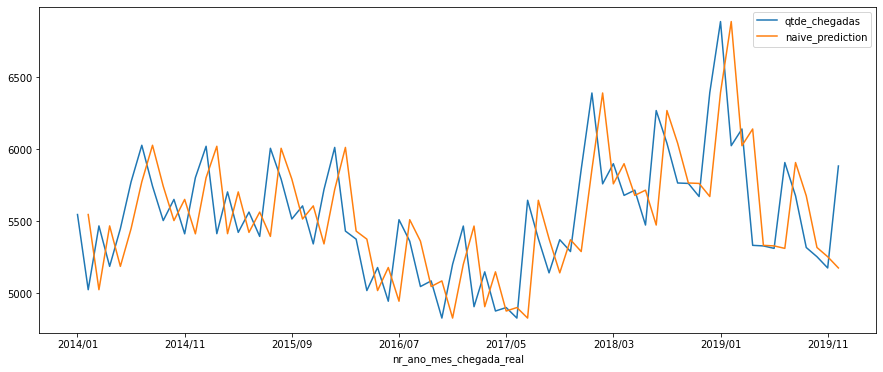

In [ ]:
df_ts.plot(figsize=(15, 6))

Validação

Faremos a validação do modelo Naive calculando o erro médio quadrático entre as previsões e os valores observados. Para tanto, faremos o cálculo da diferença quadrática entre a coluna qtde_chegadas e a coluna naive_prediction. Guardaremos a Series gerada em uma variável chamada errors. Para calcular a média do erro, utilizamos o comando Series.mean().


In [ ]:
#erro médio quadrático

((df_ts.qtde_chegadas - df_ts.naive_prediction) ** 2).mean()

#outra maneira de calcular

#erros = (df_naive.id_basica - df_naive.naive_prediction) ** 2
#erros.mean()

144874.29577464788

O modelo Naive é utilizado como referência para modelos mais sofisticados. A idéia é que modelos de previsão possuam erro médio quadrático menor que o modelo Naive. Caso contrário, temos um modelo extremamente ineficaz.

Modelo AutoRegressivo (AR)

Em modelos de regressão múltipla, fazemos a previsão da variável de interesse utilizando a combinação linear das variáveis preditoras. Em um modelo autoregressivo, fazemos a previsão da variável de interesse utilizando a combinação linear dos valores passados da mesma variável. O termo autoregressivo indica que o processo é definido como um modelo de regressão de uma variável por ela mesma.

In [ ]:
df_ts['x1'] = df_ts.qtde_chegadas.shift(1) #x1 - lag de 1 período
df_ts.dropna(axis=0, inplace=True)
df_ts.head()

#x1 é a variável de impuy

,qtde_chegadas,x1
nr_ano_mes_chegada_real,,
2014/02,5025,5547.0
2014/03,5468,5025.0
2014/04,5187,5468.0
2014/05,5449,5187.0
2014/06,5774,5449.0


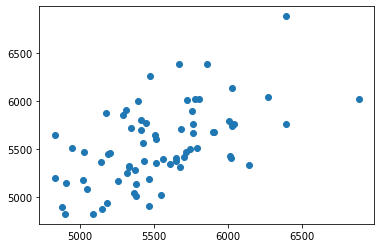

In [ ]:
plt.scatter(df_ts.x1, df_ts.qtde_chegadas)

#x1 vai aumentando, a qtde_chegadas vai aumentando

Trataremos o modelo AR(1) como uma regressão linear simples, onde x1 é a variável independente e qtde_chegadas é a variável dependente. Utilizando a classe LinearRegression do pacote sklearn, podemos criar o modelo de regressão que equivale ao modelo autoregressivo AR(1).

In [ ]:
from sklearn.linear_model import LinearRegression

X = df_ts.x1.values
y = df_ts.qtde_chegadas.values 
#X

#comando final values transforma o nosso resultado em vetor, pra gente não trabalhar com o DF, apenas com o vetor

reg = LinearRegression().fit(X.reshape(-1, 1), y)
previsoes = reg.predict(X.reshape(-1, 1))
((y - previsoes) ** 2).mean() #y (-) previsões são os nossos erros

113168.1052402981

Rodando o modelo de regressão para o AR(1) obtemos r2 = 113168.11 , valor inferior ao obtido com o modelo Naive. Abaixo, temos a representação visual do modelo de regressão linear.

Text(0, 0.5, 'qtde_chegadas')

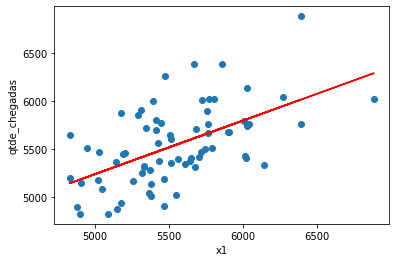

In [ ]:
plt.scatter(X, y)
plt.plot(X, reg.predict(X.reshape(-1, 1)), color='red')
plt.xlabel('x1')
plt.ylabel('qtde_chegadas')

#nosso modelo de ts tem o comportamento linear em relação ao valor imediatamente anterior sempre 


Para visualizar o modelo na forma de uma série temporal, criaremos uma nova coluna no DataFrame df1 chamada ar_1.

In [ ]:
#modelo auto regressivo de ordem 1

df_ts['ar_1'] = previsoes 
df_ts.head()

,qtde_chegadas,x1,ar_1
nr_ano_mes_chegada_real,,,
2014/02,5025,5547.0,5547.196009
2014/03,5468,5025.0,5256.222730
2014/04,5187,5468.0,5503.159823
2014/05,5449,5187.0,5346.524782
2014/06,5774,5449.0,5492.568842


<AxesSubplot:xlabel='nr_ano_mes_chegada_real'>

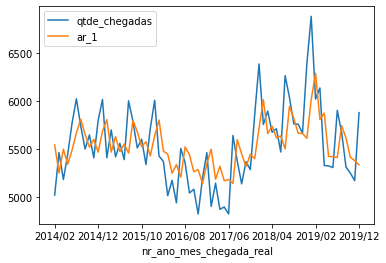

In [ ]:
df_ts[['qtde_chegadas', 'ar_1']].plot()

Faremos, agora, a aplicação do modelo de regressão para AR(2). Para tanto, acrescentaremos a coluna denominada x2, representando o lag de 2 períodos. Nesse caso, temos um modelo de regressão linear múltipla com x1 e x2 como variáveis independentes e qtde_chegadas como variável dependente.

In [ ]:
#criação de x2 - lag de 2 períodos

df_ts['x2'] = df_ts.qtde_chegadas.shift(2)
df_ts.dropna(axis=0, inplace=True)
df_ts.head()

,qtde_chegadas,x1,ar_1,x2
nr_ano_mes_chegada_real,,,,
2014/04,5187,5468.0,5503.159823,5025.0
2014/05,5449,5187.0,5346.524782,5468.0
2014/06,5774,5449.0,5492.568842,5187.0
2014/07,6028,5774.0,5673.730366,5449.0
2014/08,5744,6028.0,5815.315065,5774.0


In [ ]:
X = df_ts[['x1', 'x2']]
y = df_ts.qtde_chegadas.values

reg2 = LinearRegression().fit(X, y)
predictions = reg2.predict(X)
errors = (y - predictions) ** 2
errors.mean()

110755.43704834969

O novo modelo possui r2 = 110755.44

<AxesSubplot:xlabel='nr_ano_mes_chegada_real'>

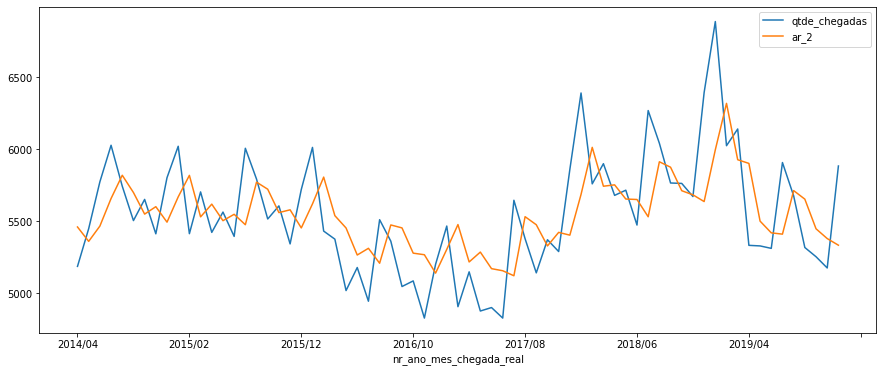

In [ ]:
#modelo auto regressivo de ordem 2

df_ts['ar_2'] = reg2.predict(X)
df_ts[['qtde_chegadas', 'ar_2']].plot(figsize=(15, 6))

In [ ]:
df_ts.head()

,qtde_chegadas,x1,ar_1,x2,ar_2
nr_ano_mes_chegada_real,,,,,
2014/04,5187,5468.0,5503.159823,5025.0,5460.515626
2014/05,5449,5187.0,5346.524782,5468.0,5360.627491
2014/06,5774,5449.0,5492.568842,5187.0,5466.723371
2014/07,6028,5774.0,5673.730366,5449.0,5658.264677
2014/08,5744,6028.0,5815.315065,5774.0,5819.764110


Utilizando o pacote statsmodels

Para facilitar o uso de modelos autoregressivos, utilizaremos o pacote statsmodels. O modelo autoregressivo encontra-se no subpacote tsa.ar_model. Para importar, utilizamos o comando from statsmodels.tsa.ar_model import AutoReg. Para criar o modelo, utilizamos o comando AR(Series).fit(p), onde p é o número de períodos passados (lag) considerados no modelo.
Faremos a criação do modelo AR(2) para comparar com o resultado gerado anteriormente. Chamaremos o modelo criado de ar_2.

In [ ]:
#utilizando o pacote statsmodels
#rodar novamente o df_ts

#from statsmodels.tsa.ar_model import AR
#from statsmodels.tsa.AutoReg import AR

from statsmodels.tsa.api import acf, graphics, pacf
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg

ar_2 = AutoReg(df_ts.qtde_chegadas, lags=2, seasonal=True, period=12).fit()

#ar_2 = AutoReg(df_ts.qtde_chegadas, freq='MS').fit(2) #2 considerando 2 períodos para trás

#ar_2 = AR(df_ts.qtde_chegadas, freq='MS').fit(2) #2 considerando 2 períodos para trás

In [ ]:
# elimina os warnings das bibliotecas
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#verificar erros residuais: 
ar_2.resid

nr_ano_mes_chegada_real
2014/03    180.247252
2014/04     27.789554
2014/05    135.620093
2014/06    377.521425
2014/07   -360.749428
2014/08     21.078431
2014/09     63.752227
2014/10     80.956936
2014/11    -58.990614
2014/12   -106.156110
2015/01   -124.642990
2015/02     49.008910
2015/03     89.122693
2015/04     82.632870
2015/05     43.361292
2015/06    -81.830480
2015/07     35.371576
2015/08     27.445411
2015/09     19.777535
2015/10     32.779447
2015/11    -79.917212
2015/12   -122.415991
2016/01    -58.582114
2016/02     61.410079
2016/03   -259.120836
2016/04     25.715789
2016/05     26.126013
2016/06   -196.959045
2016/07    -54.342425
2016/08     39.887874
2016/09    -81.800824
2016/10    -69.854720
2016/11   -128.495756
2016/12   -191.158746
2017/01   -147.057171
2017/02     20.351263
2017/03    -28.640470
2017/04     32.231236
2017/05   -141.668597
2017/06    -46.613323
2017/07    155.941828
2017/08   -104.662907
2017/09     18.400560
2017/10    119.407870
2017/11 

In [ ]:
#elevando ao quadrado, tenho o erro médio quadrático: 
ar_2.resid ** 2

nr_ano_mes_chegada_real
2014/03     32489.071712
2014/04       772.259305
2014/05     18392.809497
2014/06    142522.426039
2014/07    130140.149530
2014/08       444.300252
2014/09      4064.346436
2014/10      6554.025467
2014/11      3479.892573
2014/12     11269.119748
2015/01     15535.875001
2015/02      2401.873267
2015/03      7942.854324
2015/04      6828.191138
2015/05      1880.201644
2015/06      6696.227422
2015/07      1251.148363
2015/08       753.250606
2015/09       391.150877
2015/10      1074.492119
2015/11      6386.760772
2015/12     14985.674766
2016/01      3431.864121
2016/02      3771.197824
2016/03     67143.607559
2016/04       661.301797
2016/05       682.568540
2016/06     38792.865534
2016/07      2953.099113
2016/08      1591.042466
2016/09      6691.374832
2016/10      4879.681847
2016/11     16511.159283
2016/12     36541.666161
2017/01     21625.811440
2017/02       414.173903
2017/03       820.276498
2017/04      1038.852583
2017/05     20069.991254
2

Utilizando o atributo resid, obtemos os erros residuais das previsões de cada período da série na forma de um objeto do tipo Series do pandas. Podemos utilizar essa informação para calcular o erro quadrático do modelo elevando a Series contendo os erros residuais por 2 e calculando a média do resultado.

In [ ]:
#média do erro quadrático
(ar_2.resid ** 2).mean()

16476.49212656522

In [ ]:
ar_2.resid.describe()

count    7.000000e+01
mean     2.350199e-09
std      1.292876e+02
min     -3.614624e+02
25%     -7.830022e+01
50%      2.006440e+01
75%      6.316669e+01
max      3.775214e+02
dtype: float64

A média dos erros está muito próxima de zero, indicando que não existe uma proporção maior de erros pra cima ou pra baixo. O desvio padrão nos dá uma noção de variabilidade do erro e os quartis mostram a distribuição do mesmo.

Pra facilitar a análise da distribuição dos erros, podemos utilizar gráficos do tipo histograma e boxplot. Geramos o boxplot dos erros utilizando o comando ar_2.resid.plot(kind = 'box').

<AxesSubplot:>

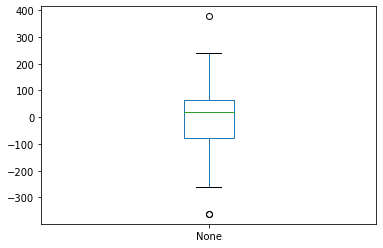

In [ ]:
#boxplot
ar_2.resid.plot(kind = 'box')

Analisando o gráfico, percebemos que a mediana (representada pela linha verde) está próxima do valor zero (com valor igual a 2.00). A posição da mediana na "caixa" do boxplot indica que os erros estão mais dispersos abaixo da mediana.

A análise pode ser finalizada com o uso do histograma dos erros. Para criar o histograma, utilizamos o comando ar_2.resid.hist().

<AxesSubplot:>

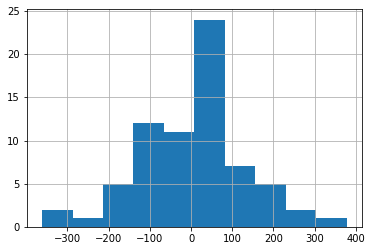

In [ ]:
#histograma
ar_2.resid.hist()


Analisando a distribuição de frequência do erro, observamos que, apesar da média estar concentrada no zero, os erros abaixo da média estão mais distribuídos do que os erros acima da média.

Para finalizar, analisaremos o modelo AR(3).

In [ ]:
#criando modelo auto regressivo de ordem 3

#ar_3 = AR(df_ts.qtde_chegadas, freq='MS').fit(15) #15 é a quantidade de lags (períodos) anteriores
#(ar_3.resid ** 2).mean()

ar_3 = AutoReg(df_ts.qtde_chegadas, lags=3, seasonal=True, period=12).fit()
(ar_3.resid ** 2).mean()



16099.088492259822

Para prever um intervalo de períodos específico, faremos a configuração dos parâmetros start e end do comando predict(). No exemplo, temos a quantidade de chegadas até o período '2019/12'. Faremos a previsão de vendas para o período seguinte fazendo start='2020/01' e end='2020/01'. Criaremos uma variável chamada forecast para guardar a Series resultante da previsão e plotaremos o resultado utilizando um gráfico plt.scatter().

ConversionError: Failed to convert value(s) to axis units: DatetimeIndex(['2020-01-01'], dtype='datetime64[ns]', freq='MS')

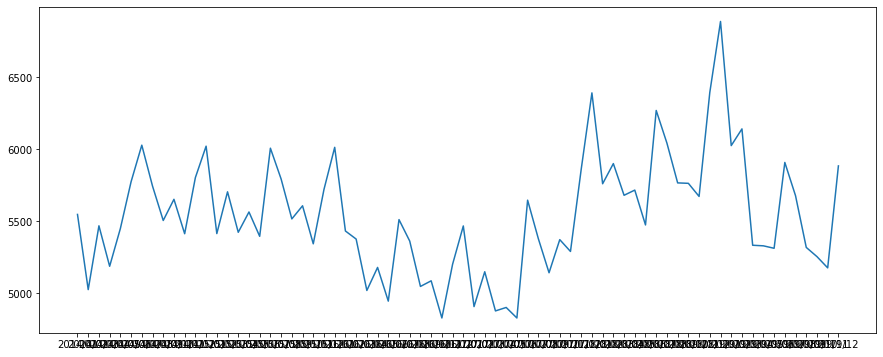

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(df_ts.qtde_chegadas)
forecast = ar_3.predict(start='2020/01', end='2020/01')
plt.scatter(forecast.index, forecast.values, color='red')
plt.legend(['qtde_chegadas', 'projeção'])
plt.xticks(rotation=45)

In [ ]:
ar_3.predict(start='2020/01', end='2020/02')

2020-01-01    6263.665169
2020-02-01    5599.059210
Freq: MS, dtype: float64

Para séries temporais, estamos interessados na previsão somente do próximo período. As previsões para o período '2020/02',no exemplo cima, utilizariam a previsão feita no período '2020/01' como imput, reduzindo drasticamente a qualidade da previsão.

Autocorrelação Total e Parcial

A autocorrelação é a medida de correlação entre uma variável e valores passados da mesma. Na autocorrelação total, a correlação entre a observação Xt e a observação Xt-p é calculada levando em consideração a dependência linear das observações intermediárias Xt-1, Xt-2,..., Xt-p+1. A autocorrelação parcial, por outro lado, calcula a correlação entre a observação Xt e Xt-p eliminando a dependência linear das observações intermediárias.


Para criar os gráficos de autocorrelação parcial e total, utilizaremos as funções plot_pacf() e plot_acf(), respectivamente. As duas funções fazem parte do subpacote statsmodels.graphics.tsaplots e recebem como parâmetro a Series contendo a série temporal e o parâmetro lags para definição do número de períodos anteriores considerados.

Para a correção de bugs na criação do gráfico, acrescentaremos o comando plt.show().

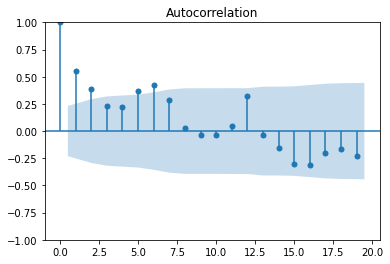

In [ ]:
#gráfico autocorrelação total
#rodar novamente o df_ts
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df_ts.qtde_chegadas)
plt.show()

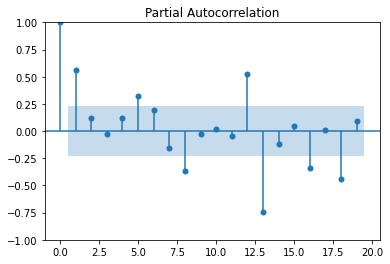

In [ ]:
#gráfico autocorrelação parcial
plot_pacf(df_ts.qtde_chegadas)
plt.show()

In [ ]:
#from statsmodels.tsa.ar_model import AR
#model = AR(df_ts.qtde_chegadas, freq="MS").fit(2) #modelo autoregressivo de ordem 2 - definindo o valor de p para o modelo

from statsmodels.tsa.api import acf, graphics, pacf
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg

model = AutoReg(df_ts.qtde_chegadas, lags=2, seasonal=True, period=12).fit()

Validação train/test

Dependendo do modelo preditivo aplicado a uma série temporal, corremos o risco de nos deparar com problemas de overfitting. Dessa forma, precisamos estabelecer um procedimento de teste com a dinâmica train/test.

Imaginemos o modelo preditivo como sendo um aluno que precisa estudar para uma prova. Para tanto, este tenta resolver um conjunto de questões de uma lista de exercícios. Caso a prova contenha as mesmas questões (ou um sub conjunto) da lista de exercícios, corremos o risco do aluno ter decorado as respostas, obtendo uma nota alta sem ter aprendido de fato sobre o conteúdo. Por outro lado, quando novas questões são aplicadas na prova, o aluno precisa ter aprendido sobre o conteúdo para obter uma nota satisfatória.

A mesma lógica pode ser aplicada para a validação de modelos de séries temporais. Considerando uma séries com
períodos, por exemplo, t = 1, 2, ..., n, dividiremos o conjunto de períodos em 2. Sendo um reservado para o "treinamento" do modelo e o outro para "testar" o mesmo.

Para séries temporais, o conjunto contendo os períodos mais antigos serão sempre utilizados como conjunto de treinamento. O tamanho do conjunto de treinamento deve, também, sempre ser maior que o conjunto de teste. Essa divisão costuma obedecer a regra: treinamento (2/3) e teste (1/3).

Aplicando o comando python len() na Series, obtemos o número de períodos para a mesma. Dessa forma, multiplicaremos o número total de períodos por 2/3 e aplicaremos o resultado no comando python int(), para que o resultado seja sempre um número inteiro. Chamaremos o resultado final de train_size.

In [ ]:
#validação train/test
train_size = int(len(df_ts.qtde_chegadas) * 2/3)
train_size

48

O conjunto de treinamento conterá os train_size = 48 primeiros períodos da séries temporal. Utilizaremos o comando Series[:n] para filtrar os primeiros valores, dando o nome train_set ao resultado. Para o conjunto de testes denominado test_set, utilizaremos o comando Series[n:].

In [ ]:
train_set = df_ts.qtde_chegadas[:train_size]

In [ ]:
test_set = df_ts.qtde_chegadas[train_size:]
test_set

nr_ano_mes_chegada_real
2018/01    6391
2018/02    5760
2018/03    5900
2018/04    5680
2018/05    5716
2018/06    5474
2018/07    6269
2018/08    6042
2018/09    5766
2018/10    5763
2018/11    5672
2018/12    6394
2019/01    6887
2019/02    6025
2019/03    6141
2019/04    5333
2019/05    5329
2019/06    5312
2019/07    5908
2019/08    5677
2019/09    5318
2019/10    5254
2019/11    5176
2019/12    5884
Name: qtde_chegadas, dtype: int64

<Figure size 2160x864 with 0 Axes>

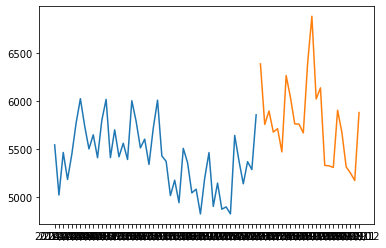

<Figure size 2160x864 with 0 Axes>

In [ ]:
plt.plot(train_set)
plt.plot(test_set)
plt.figure(figsize=(30, 12))
#plt.xticks(rotation=45)

In [ ]:
#ar_2 = AR(train_set, freq = 'MS').fit(2)
#ar_2.params

#model = AutoReg(df_ts.qtde_chegadas, lags=2, seasonal=True, period=12).fit()

ar_2 = AutoReg(train_set, lags=2, seasonal=True, period=12).fit()
ar_2.params

const               859.551200
s(2,12)            -806.166620
s(3,12)             -21.706844
s(4,12)            -565.326129
s(5,12)            -126.388588
s(6,12)            -317.798535
s(7,12)             287.898695
s(8,12)            -471.864175
s(9,12)            -494.432623
s(10,12)           -128.399360
s(11,12)           -472.381718
s(12,12)            160.304912
qtde_chegadas.L1      0.940957
qtde_chegadas.L2     -0.052307
dtype: float64

Criaremos, agora, um modelo auto-regressivo de ordem 2 (AR(2)) a partir do conjunto de treinamento train_set. Acessando o atributo params obtemos os parâmetros do modelo AR(2).

Com base nos parâmetros do modelo AR(2), podemos aplicar o mesmo utilizando a equação:

Xt = 859.55 + 0.94Xt-1 - 0.05Xt-2

Para obter as previsões para o conjunto de testes test_set, aplicaremos a equação acima neste conjunto. Atribuiremos os resultados em uma variável chamada previsoes.

In [ ]:
#previsões sobre o nosso conjunto de teste / previsão a partir de mar, pois ele depende de jan e fev
previsoes = ar_2.params[0] + ar_2.params[12] * test_set.shift(12) + ar_2.params[13] * test_set.shift(13) 

#previsoes = ar_2.params[0] + test_set.shift(1) * ar_2.params[1] + test_set.shift(2) * ar_2.params[2]

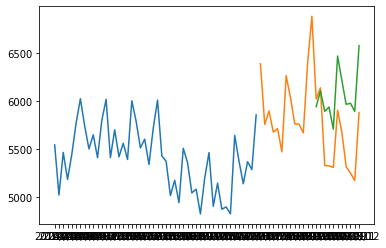

In [ ]:
plt.plot(train_set)
plt.plot(test_set)
plt.plot(previsoes)

Com o gráfico, percebemos que o modelo AR(2) não obteve um resultado satisfatório. Para p=2, o modelo não conseguiu responder a mudança de inclinação nas vendas contidas no conjunto de treinamento. O resultado ruim se confirma com o cálculo do erro médio quadrático.

In [ ]:
((test_set - previsoes) ** 2).mean()

310927.5748553807

Faremos, agora, um teste com o modelo AR(5).

In [ ]:
ar_5 = AutoReg(train_set, lags=5, seasonal=True, period=2).fit()
ar_5.params

const               1362.008936
s(2,2)              -199.156199
qtde_chegadas.L1       0.466155
qtde_chegadas.L2       0.010595
qtde_chegadas.L3       0.064431
qtde_chegadas.L4      -0.176390
qtde_chegadas.L5       0.404091
dtype: float64

In [ ]:
#valores negativos impactam de forma negativa a nossa previsão
previsoes = ar_5.params[0]
for i, coef in enumerate(ar_5.params[2:]):
  previsoes += coef * test_set.shift(i + 1)

previsoes

nr_ano_mes_chegada_real
2018/01            NaN
2018/02            NaN
2018/03            NaN
2018/04            NaN
2018/05            NaN
2018/06    6033.408564
2018/07    5627.129764
2018/08    6092.856768
2018/09    5884.620249
2018/10    5862.013099
2018/11    5605.044323
2018/12    5906.102226
2019/01    6198.463486
2019/02    6319.064081
2019/03    5983.820744
2019/04    5896.400446
2019/05    5670.229997
2019/06    6018.543871
2019/07    5589.728861
2019/08    6056.516996
2019/09    5628.254715
2019/10    5498.241099
2019/11    5337.721883
2019/12    5559.137200
Name: qtde_chegadas, dtype: float64

In [ ]:
((test_set - previsoes) ** 2).mean()

160272.54398520762

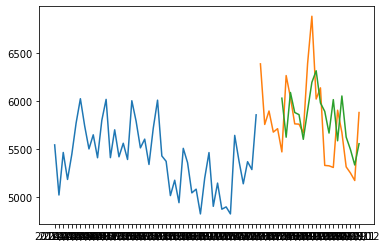

In [ ]:
plt.plot(train_set)
plt.plot(test_set)
plt.plot(previsoes)

Com p=5, observamos uma melhoria substancial nas previsões.
Pelo gráfico, observa-se que as previsões estão seguindo as inclinações e o comportamento de subida e descida da série.

ARIMA

Modelo Integrado Auto-regressivo de Média Móveis (ARIMA)

ARIMA é a acrônimo que significa "Autoregressive Integrated Moving Average Model" (Modelo de médias móveis integrado de auto regressivo).

Esse acrônimo é descritivo, capturando os aspectos chave do próprio modelo. Resumidamente, estes são:

AR: Auto regressão. Um modelo que utiliza a relação de dependência entre uma observação e um conjunto de observações passadas.

I: Integrated. O uso de diferenças das obervações para tornar uma série estacionária.

MA: Média móvel. Um modelo que usa a dependência entre uma observação e o erro residual das média móveis aplicadas em observações anteriores.

Cada um desses componentes são explicitamente especificados no modelo através de parâmetros. Uma notação padrão é utilizada como ARIMA(p, d, q), onde os parâmetros são substituidos por valores inteiros para indicar o modelo ARIMA específico que está sendo utilizado.

Os parâmetros do modelo ARIMA são definidos como:

p: o número de observações passadas inclusas no modelo, também chamado de "ordem do lag".
d: o número de diferenças tomadas, também chamado de "grau de diferenciação"
q: o tamanho da janela da média móvel, também chamado de "ordem da média móvel"

A vantagem do modelo ARIMA em relação ao modelo ARMA está na possibilidade de trabalhar com séries não estacionárias.

In [ ]:
#from statsmodels.tsa.api import acf, graphics, pacf
#from statsmodels.tsa.ar_model import AutoReg, ar_select_order

#import statsmodels.api as sm
#from statsmodels.tsa.ar_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
#Prevendo Chegadas com ARIMA

# elimina os warnings das bibliotecas
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot

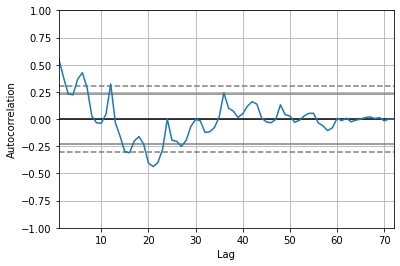

In [ ]:
# autocorrelation plot 
autocorrelation_plot(df_ts.qtde_chegadas)
pyplot.show()

In [ ]:
import pandas.util.testing as tm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

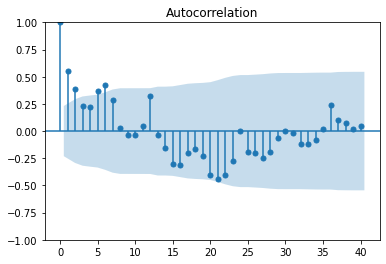

In [ ]:
plot_acf(df_ts.qtde_chegadas, lags = 40)
pyplot.show()

In [ ]:
# ARIMA(p,d,q)
model = ARIMA(df_ts.qtde_chegadas, order=(7,1,1))

In [ ]:
model_fit = model.fit()

In [ ]:
# summary 
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:          qtde_chegadas   No. Observations:                   72
Model:                 ARIMA(7, 1, 1)   Log Likelihood                -505.700
Date:                Sun, 19 Dec 2021   AIC                           1029.400
Time:                        21:41:54   BIC                           1049.764
Sample:                    01-01-2014   HQIC                          1037.498
                         - 12-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6709      0.540     -1.243      0.214      -1.729       0.387
ar.L2         -0.2658      0.278     -0.955      0.340      -0.811       0.280
ar.L3         -0.2514      0.207     -1.212      0.2

In [ ]:
# plot residuais erros entre a previsão, o valor real e o valor predito
from pandas import DataFrame
residuals = DataFrame(model_fit.resid)

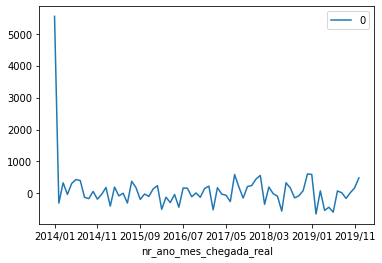

In [ ]:
residuals.plot()
pyplot.show()

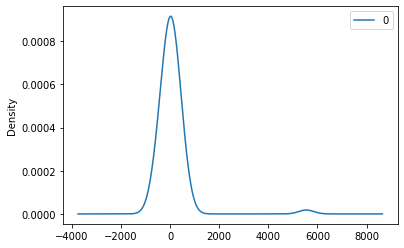

In [ ]:
# gráficos de densidade dos residuais
residuals.plot(kind='kde')
pyplot.show()

In [ ]:
# estatística descritiva dos residuos
print(residuals.describe()) #modelo enviesado negativamente

                 0
count    72.000000
mean     86.673068
std     717.920294
min    -647.553556
25%    -150.057423
50%       7.380063
75%     198.337985
max    5547.000000


In [ ]:
#Separando os dados de treino e teste

# a variável X recebe os dados da série
X = df_ts.qtde_chegadas.values
X = X.astype('float32')

In [ ]:
# Separa os dados com 50% dos dados para treino e 50% dos dados para teste
size = int(len(X) * 0.50)

In [ ]:
# Separa dados de treino e teste
train = X[0:size]
test =  X[size:]

In [ ]:
# cria a variável history
history = [x for x in train]

In [ ]:
# cria lista de previsões
predictions = list()

In [ ]:
# Cria a função que faz a diferenciação
def difference(dataset, interval=1):
  diff = list() 
  for i in range(interval, len(dataset)):
    value = dataset[i] - dataset[i - interval]
    diff.append(value)
  return diff

# cria função que reverte o valor diferenciado para o original
def inverse_difference(history, previsao, interval=1):
  return previsao + history[-interval]

In [ ]:
import statsmodels.tsa.arima.model as smt

In [ ]:
# inicia Walk-Forward
for t in range(len(test)):
  
  # difference data
  meses_no_ano = 12
  diff = difference(history, meses_no_ano)
  
  # cria um modelo ARIMA com os dados de history
  model = ARIMA(diff, order=(0,0,1),trend='n')
  
  # treina o modelo ARIMA
  model_fit = model.fit()
  
  # a variável valor_predito recebe o valor previsto pelo modelo
  valor_predito = model_fit.forecast()[0]

  # valor_predito recebe o valor revertido (escala original)
  valor_predito = inverse_difference(history, valor_predito, meses_no_ano)
   
  # adiciona o valor predito na lista de predicões
  predictions.append(valor_predito)
  
  # a variável valor_real recebe o valor real do teste
  valor_real = test[t]
  
  # adiciona o valor real a variável history
  history.append(valor_real)

  # imprime valor predito e valor real
  print('Valor predito=%.3f, Valor esperado=%3.f' % (valor_predito, valor_real))


Valor predito=5786.641, Valor esperado=5467
Valor predito=5172.256, Valor esperado=4907
Valor predito=5157.361, Valor esperado=5149
Valor predito=5012.172, Valor esperado=4877
Valor predito=5065.457, Valor esperado=4901
Valor predito=4806.799, Valor esperado=4828
Valor predito=5529.172, Valor esperado=5646
Valor predito=5462.641, Valor esperado=5379
Valor predito=4975.439, Valor esperado=5142
Valor predito=5225.393, Valor esperado=5372
Valor predito=4949.570, Valor esperado=5290
Valor predito=5487.562, Valor esperado=5860
Valor predito=5778.374, Valor esperado=6391
Valor predito=5440.909, Valor esperado=5760
Valor predito=5372.462, Valor esperado=5900
Valor predito=5297.076, Valor esperado=5680
Valor predito=5225.216, Valor esperado=5716
Valor predito=5348.644, Valor esperado=5474
Valor predito=5768.392, Valor esperado=6269
Valor predito=5868.146, Valor esperado=6042
Valor predito=5382.118, Valor esperado=5766
Valor predito=5816.144, Valor esperado=5763
Valor predito=5237.988, Valor es

In [ ]:
# Avaliando os resultados #nosso modelo errou 300 para cima / para baixo
from numpy import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 300.515


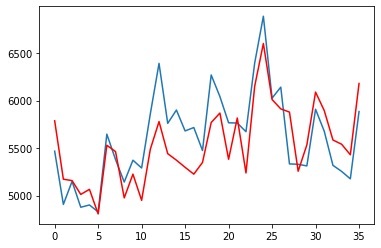

In [ ]:
# plot forecasts against actual outcomes 

#Analisando Resíduos
#Erro Residual = Valor esperado (−) Valor Predito
#Erros residuais são erros em previsões de séries temporais.
#Uma análise dos erros pode sugerir melhoras no modelo.
#Tendências.
#Sazonalidades.

pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [ ]:
# erros residuais 
residuals = [test[i] - predictions[i] for i in range(len(test))]

In [ ]:
# converte a lista em um dataframe
residuals = pd.DataFrame(residuals)

In [ ]:
# imprime as 5 primeiras linhas
residuals.head()

,0
0,-319.640841
1,-265.255851
2,-8.360800
3,-135.172120
4,-164.457495


In [ ]:
# estatística descritiva
residuals.describe()

,0
count,36.000000
mean,74.044408
std,295.381976
min,-545.321665
25%,-190.033044
50%,94.831094
75%,324.425531
max,612.625705


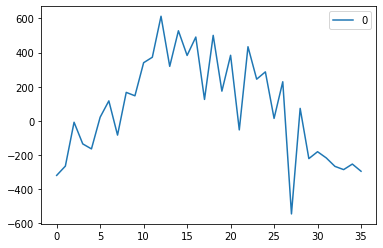

In [ ]:
# plot residuals
residuals.plot()
pyplot.show()

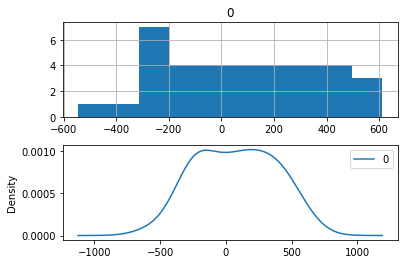

In [ ]:
# plots histograma
pyplot.figure()
pyplot.subplot(211)
residuals.hist(ax=pyplot.gca())

pyplot.subplot(212)
residuals.plot(kind='kde', ax=pyplot.gca())
pyplot.show()

In [ ]:
# importa os pacotes de autocorrelação
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

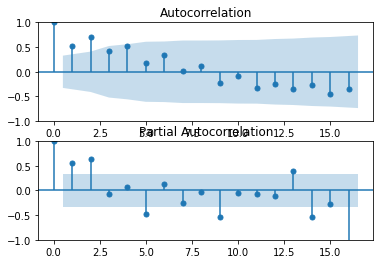

In [ ]:
# plots de autocorrelação
pyplot.figure() 
pyplot.subplot(211)
plot_acf(residuals, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(residuals, ax=pyplot.gca())
pyplot.show()

Modelo Auto-regressivo Sazonal de Média Móveis Integrado (SARIMA)

Apesar do método ARIMA ser capaz de lidar com tendências em séries temporais, o mesmo não possui a capacidade de lidar com variáveis sazonais. Ou seja, séries com ciclos que se repetem. O método ARIMA assume que os dados não são sazonais ou que a sazonalidade foi removida no processo de diferenciação.

O "Seasonal Autoregressive Integrated Moving Average", SARIMA ou ARIMA Sazonal, é uma extenção do ARIMA que suporta, de maneira explícita, séries temporais com componente sazonal através da adição de três novos parâmetros para especificar a autoregressão (AR), diferenciação (I) e média móvel (MA) para a componente sazonal da série, além de um parâmetro adicional para o período da sazonalidade.
Configurando o SARIMA

Para configurar o SARIMA precisamos selecionar os parâmetros para os elementos de tendência e sazonalidade da série.
Elementos de tendência

Existem três elementos de tendência. Estes são os mesmos do modelo ARIMA.

p: Ordem do AR
d: Ordem de diferenças
q: Ordem do MA

Elementos sazonais

Existem quatro elementos sazonais que não fazem parte do ARIMA

P: Ordem do AR sazonal
D: Odem de diferenças sazonais
Q: Ordem do MA sazonal
s: Número de períodos referentes ao ciclo sazonal

A notação final do SARIMA é definida como SARIMA(p, d, q)(P, D, Q)s.

<AxesSubplot:xlabel='nr_ano_mes_chegada_real'>

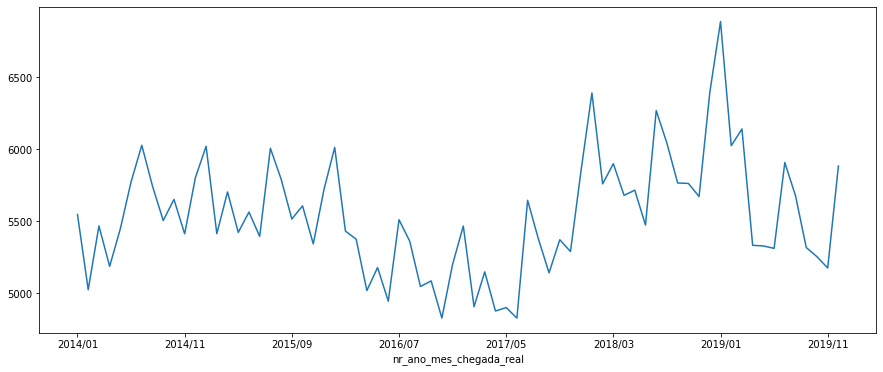

In [ ]:
df_ts.qtde_chegadas.plot(figsize=(15, 6))

In [ ]:
df_ts.groupby(df_ts.index.month).mean().plot(kind='bar')

#média de todos os anos para cada mês
#analisando o gráfico percebemos que, em média, temos pico nos meses de jan, jul e dez. O padrão sugeste uma ciclagem anual, i.e., $s=12$ meses.

AttributeError: 'Index' object has no attribute 'month'

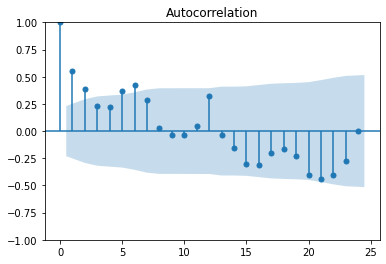

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df_ts.qtde_chegadas, lags=24)
plt.show()

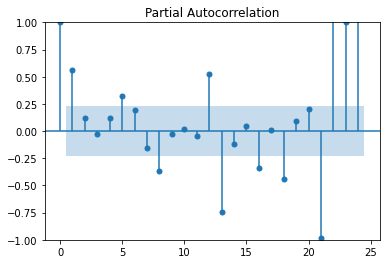

In [ ]:
plot_pacf(df_ts.qtde_chegadas, lags=24)
plt.show()

In [ ]:
#verificando se a nossa série é estácionaria, considerando a nossa componente sazonal
df_ts[df_ts.index.month == '12'].plot()

In [ ]:
#não parece ter comportamento estacionario, variancia não é constante
df_ts.groupby(df_ts.index.month).plot()

Para utilizar o SARIMA, faremos a importação da classe SARIMAX presente no subpacote statsmodels.tsa.statespace.sarimax. Os parâmetros de tendência p, d e q são configurados através do parâmetro order=(p, d, q) e os parâmetro de sazonalidade P, D, Q e s são configurados através do parâmetro seasonal_order=(P, D, Q, s).

Faremos um teste com a configuração SARIMA(2, 1, 2)(3, 1, 2)12.

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
#verificar erro
sarima = SARIMAX(df_ts.qtde_chegadas, freq = 'MS', order = (2, 1, 1), seasonal_order= (3, 1, 2, 12)).fit()
(sarima.resid ** 2).mean()

555834.4357969583

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

arima = ARIMA(df_ts.qtde_chegadas, freq='MS', order=(2, 1, 2)).fit()
(arima.resid ** 2).mean()

541814.8475826561

Faremos, agora, a previsão para o próximo período desconhecido da série, utilizando o comando forecast().

In [ ]:
sarima.forecast()[0]

6302.264798860582